# K nearest neighbors in 2D
## Introduction
The k nearest neighbors algorithm is a simple supervised learning algorithm. It can be used to assign unlabelled data points to existing categories/labels given a set of labelled data. Lets look at a quick example: 


Text(0, 0.5, 'Fruit Height (cms)')

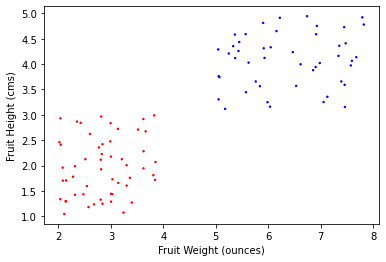

In [8]:
from matplotlib import pyplot as plt
from matplotlib import colors
import random
import pandas as pd
import numpy as np
import statistics

# Create a fake dataset of fruit weight, height, and label
fruit_weight = []
fruit_height = []
labels = []
color_pallate = ['red', 'blue']

for i in range(100):
    probability = random.uniform(0,1)
    if probability > 0.5: 
        fruit_weight.append(random.uniform(5, 8))
        fruit_height.append(random.uniform(3, 5))
        labels.append(1)
    else:
        fruit_weight.append(random.uniform(2, 4))
        fruit_height.append(random.uniform(1, 3))
        labels.append(0)
        
fruit_weight = np.asarray(fruit_weight)
fruit_height = np.asarray(fruit_height)
labels = np.asarray(labels)

# Plot the data        
fig, ax = plt.subplots()        
ax.scatter(fruit_weight, fruit_height, s=2, c=labels, cmap=colors.ListedColormap(color_pallate))
ax.set_xlabel("Fruit Weight (ounces)")
ax.set_ylabel("Fruit Height (cms)")

## Categorizing data using existing labels
I created a fake dataset of fruit weight and height, after which they were categorized in to one of two classes. An apple (1) or a lemon(0.) The question now is, given some fruit of known weight and height, but no label, can we use our existing labelled data to categorize it? KNN allows us to do this quite easily by **keeping track of the 'k' nearest neighboring points, and simply assigning the datapoint to whichever label has a majority amongst the neighboring points.**

The complexity of KNN is rooted in the search algorithm that finds the 'k' nearest neighbors. The approach is calculating the **euclidian distances** between the unlabelled datapoint and all the labelled datapoints. 
The euclidian distance between two points 'a' and 'b' with 'i' features is defined as: 

### $\sqrt{  \sum_{n=0}^{i} (a_{i} - b_{i})^2 } $

We compute this euclidian distance between the datapoint we'd like to predict a label for, and all the other points. 

In [9]:
# Define a function to compute the euclidian distance given two feature vectors
def euclidian_distance(d1,d2): 
    # d1 = datapoint 1
    # d2 = datapoint 2
    euclidian = np.sqrt(np.sum((d1-d2)**2))
    return euclidian

# k nearest neighbors function for 2D case
def k_nearest_neighbors(feature_1, feature_2, datapoint, k):
    
    '''
        feature_1: 
            array of the first feature (weights)
        feature_2: 
            array of the second feature (heights)
        datapoint: 
            numpy array containing unlabelled datapoint (in the form np.array([weight, height]))
        k: 
            Number of neighbors to consider
    '''
    
    # Instantiate an array that will hold the euclidian distances 
    euclidian_distances = np.zeros((1, len(feature_1))).flatten()
    
    # Iterate through each labelled data point and compute the euclidian distance to the unlabelled point
    for i in range(len(feature_1)):
        euclidian_distances[i] = euclidian_distance(np.asarray(feature_1[i], feature_2[i]), datapoint)
        
    # Return the indices of the first k smallest euclidian distances 
    return np.argsort(euclidian_distances)[:k]
    
# Perform a prediction with an unlabelled datapoint using 5 neighbors    
label_dict = {1: 'Apple', 0: 'Lemon'}
unlabelled_datapoint = np.asarray([4,3])
k_indices = k_nearest_neighbors(fruit_weight, fruit_height, unlabelled_datapoint, 5)

# Acquire the labels of the k nearest points
k_nearest_labels = labels[k_indices]

prediction = statistics.mode(k_nearest_labels)
print("Datapoint prediction is:")
print(label_dict[prediction])

Datapoint prediction is:
Lemon


Visualizing this prediction, we can see that the algorithm has made a pretty accurate guess given the clustering: 

Text(0, 0.5, 'Fruit Height (cms)')

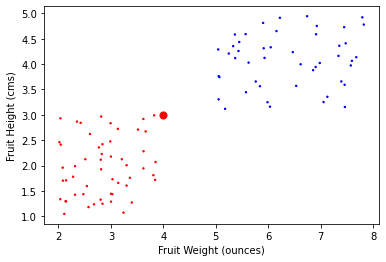

In [10]:
# Plot the data        
fig, ax = plt.subplots() 
ax.scatter(fruit_weight, fruit_height, s=2, c=labels, cmap=colors.ListedColormap(color_pallate))
ax.scatter(unlabelled_datapoint[0], unlabelled_datapoint[1], s=50, color="red")
ax.set_xlabel("Fruit Weight (ounces)")
ax.set_ylabel("Fruit Height (cms)")

## Complexity
It is worth noting here that our algorithm needs to loop through all 'n' training oversations to compute the euclidian distance. After that, we take advantage of numpy's built in sorting algorithms to order the unsorted labels. The first part of this algorithm is **O(nd)** time complexity, where **d** refers to the number of operations it takes for computing the euclidian distance (which scales based on the number of features each data point has.) The sorting algorithm is **O(n)** complexity. So the overall time complexity of this implementation is **O(nd) + O(n)**, which we simplify to **O(nd)**. 

Our space complexity is **O(n)** since we are storing all the euclidian distances and lables in separate data structures. 